In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

In [2]:
#ensure that all the columns are read as string
dt = {}
for i in range(6):
    for j in range(6):
        dt[str(i)+str(j)] = str

#load dataframe
df = pd.read_csv("../input/mlware23/dataset/train/train_landmarks.csv", dtype = dt)
dl = pd.read_csv("../input/mlware23/dataset/train/train_faces.csv",dtype=dt)

In [3]:
df.head(5)

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,AAHRMrGn0B.jpg,00,35,30,52,15,45,04,05,14,...,55,03,33,43,41,50,31,34,21,11
1,jpEcMy3zDs.jpg,42,34,51,32,13,33,04,10,12,...,40,22,05,43,23,14,41,21,52,35
2,uyDprath60.jpg,50,15,14,13,24,12,53,52,23,...,00,02,55,30,22,05,41,20,43,45
3,k4WEXM5f7C.jpg,21,45,53,20,34,52,15,11,54,...,50,02,42,41,14,43,40,32,25,44
4,lG9bsx1nKj.jpg,12,51,01,13,33,15,20,10,22,...,24,34,25,14,55,44,30,23,35,52


In [4]:
dl.head(5)

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,hwJUKjziH0.jpg,22,20,14,04,43,40,35,53,25,...,31,41,13,32,33,10,02,30,50,44
1,smzyIVQ4Ve.jpg,03,50,43,14,05,13,33,52,01,...,41,35,45,30,44,22,51,00,32,15
2,IT3H2QbaJY.jpg,55,25,43,10,33,20,22,13,54,...,00,42,11,41,12,23,30,51,35,32
3,Yceag6Ca0B.jpg,12,32,52,05,15,42,55,04,10,...,34,20,13,21,22,45,33,41,23,35
4,nDBcp5ZyPj.jpg,33,44,12,45,50,54,20,24,00,...,55,34,04,25,52,15,11,21,02,32


In [5]:
#a function to rearrange the puzzle pieces to their right positions
def rearrange(df, idx):
    img_name = df.loc[idx, "image"]
    im = Image.open("../input/mlware23/dataset/train/landmarks/" + img_name)
    im = np.array(im)
    new_im = np.zeros_like(im)
    cut = im.shape[0]//6
    for i in range(6):
        for j in range(6):
            r, c = int(df.loc[idx, str(i)+str(j)][0]), int(df.loc[idx, str(i)+str(j)][1])
            new_im[r*cut:(r+1)*cut, c*cut:(c+1)*cut] = im[i*cut:(i+1)*cut, j*cut:(j+1)*cut]
    return im, new_im

In [6]:
#a function to rearrange the puzzle pieces to their right positions
def rearrangee(dl, idx):
    img_name = dl.loc[idx, "image"]
    im = Image.open("../input/mlware23/dataset/train/faces/" + img_name)
    im = np.array(im)
    new_im = np.zeros_like(im)
    cut = im.shape[0]//6
    for i in range(6):
        for j in range(6):
            r, c = int(dl.loc[idx, str(i)+str(j)][0]), int(dl.loc[idx, str(i)+str(j)][1])
            new_im[r*cut:(r+1)*cut, c*cut:(c+1)*cut] = im[i*cut:(i+1)*cut, j*cut:(j+1)*cut]
    return im, new_im

Text(0.5, 1.0, 'ground_truth')

<Figure size 640x480 with 0 Axes>

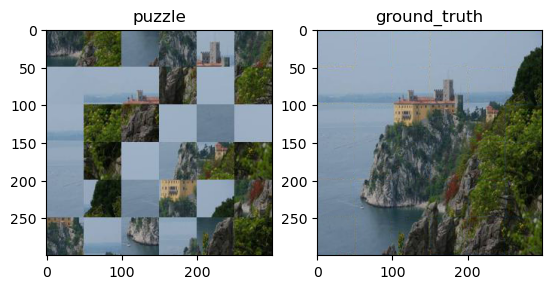

In [7]:
puzzle, solved = rearrange(df, 1)

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(puzzle)
axarr[0].set_title("puzzle")
axarr[1].imshow(solved)
axarr[1].set_title("ground_truth")

Text(0.5, 1.0, 'ground_truth')

<Figure size 640x480 with 0 Axes>

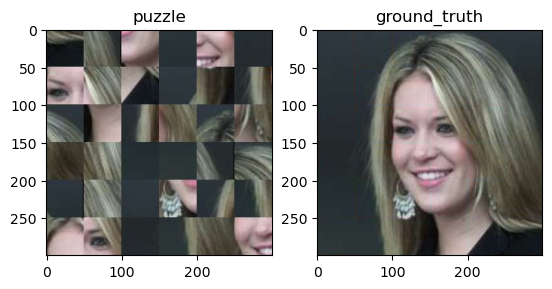

In [8]:
puzzle, solved = rearrangee(dl, 2)

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(puzzle)
axarr[0].set_title("puzzle")
axarr[1].imshow(solved)
axarr[1].set_title("ground_truth")

In [9]:
#train test split
n = len(df)
val_split = 0.2
val_df = df[:int(n*val_split)]
train_df = df[int(n*val_split):]

In [10]:
#train test split
nn = len(dl)
val_splitt = 0.2
val_dff = dl[:int(nn*val_splitt)]
train_dff = dl[int(nn*val_splitt):]

In [11]:
# a function that loads the all the images directly
# each image is cut into 36 puzzle pieces and each piece is stored as a seperate array
def load_images(df):
    ret = []
    for idx in tqdm(df.index):
        pieces = []
        img_name = df.loc[idx, "image"]
        img = Image.open("../input/mlware23/dataset/train/landmarks/"+img_name)
        img = np.array(img)
        for i in range(6):
            for j in range(6):
                pieces.append(img[i*50:(i+1)*50, j*50:(j+1)*50])  
        ret.append(pieces)
    return np.array(ret)

In [12]:
# a function that loads the all the images directly
# each image is cut into 36 puzzle pieces and each piece is stored as a seperate array
def load_imagess(dl):
    ret = []
    for idx in tqdm(dl.index):
        pieces = []
        img_name = dl.loc[idx, "image"]
        img = Image.open("../input/mlware23/dataset/train/faces/"+img_name)
        img = np.array(img)
        for i in range(6):
            for j in range(6):
                pieces.append(img[i*50:(i+1)*50, j*50:(j+1)*50])  
        ret.append(pieces)
    return np.array(ret)

In [13]:
train_img = load_images(train_df)
val_img = load_images(val_df)

100%|██████████| 600/600 [00:03<00:00, 150.85it/s]


In [14]:
train_imgf = load_imagess(train_dff)
val_imgf = load_imagess(val_dff)

100%|██████████| 19/19 [00:00<00:00, 172.23it/s]


In [15]:
print(train_img.shape)
print(val_img.shape)
#2400 puzzles, 36 pieces, each piece is a 50x50x3 image

(2400, 36, 50, 50, 3)
(600, 36, 50, 50, 3)


In [16]:
print(train_imgf.shape)
print(val_imgf.shape)
#2400 puzzles, 36 pieces, each piece is a 50x50x3 image

(80, 36, 50, 50, 3)
(19, 36, 50, 50, 3)


In [17]:
'''
a function that one hot encodes the given labels.
we have a total of 36 puzzle pieces and 36 possible positions for each of those pieces
if piece at index i has its correct position at index j, we make label[i][j] = 1 
and all the other values in label[i] are set to 0

we iterate through all positions using i and j.
for each position, its index out of 36 will be i*6+j 
and same for the value in that column
'''
def load_labels(df):
    ret = []
    for idx in tqdm(df.index):
        label = np.zeros(shape=(36,36))
        for i in range(6):
            for j in range(6):
                place = i*6 + j
                val = int(df.loc[idx, str(i)+str(j)][0])*6 + int(df.loc[idx, str(i)+str(j)][1])
                label[place][val] = 1
        ret.append(label)
    return np.array(ret)

In [18]:
'''
a function that one hot encodes the given labels.
we have a total of 36 puzzle pieces and 36 possible positions for each of those pieces
if piece at index i has its correct position at index j, we make label[i][j] = 1 
and all the other values in label[i] are set to 0

we iterate through all positions using i and j.
for each position, its index out of 36 will be i*6+j 
and same for the value in that column
'''
def load_labelss(dl):
    ret = []
    for idx in tqdm(dl.index):
        label = np.zeros(shape=(36,36))
        for i in range(6):
            for j in range(6):
                place = i*6 + j
                val = int(dl.loc[idx, str(i)+str(j)][0])*6 + int(dl.loc[idx, str(i)+str(j)][1])
                label[place][val] = 1
        ret.append(label)
    return np.array(ret)

In [19]:
train_labels = load_labels(train_df)
val_labels = load_labels(val_df)

100%|██████████| 600/600 [00:00<00:00, 1174.86it/s]


In [20]:
train_labelss = load_labels(train_dff)
val_labelss = load_labels(val_dff)

100%|██████████| 19/19 [00:00<00:00, 970.06it/s]


In [21]:

print(train_labels.shape)
print(val_labels.shape)
#2400 puzzles, 36x36 one hot encoded matrix as output

(2400, 36, 36)
(600, 36, 36)


In [22]:

print(train_labelss.shape)
print(val_labelss.shape)
#2400 puzzles, 36x36 one hot encoded matrix as output

(80, 36, 36)
(19, 36, 36)


In [23]:
# #Modified Model

# inp = tf.keras.layers.Input(shape=(36,50,50,3)) #input all puzzle pieces at once

# #here we define the layers and feed the input later
# conv1 = tf.keras.layers.Conv2D(64, (5,5), strides=5, activation='relu')(inp)
# conv2 = tf.keras.layers.Conv2D(128, (5,5), strides=5, activation='relu')(conv1)
# flat = tf.keras.layers.Flatten()(conv2)
# dense1 = tf.keras.layers.Dense(128, activation='relu')(flat)
# dropout=tf.keras.layers.Dropout(rate=0.3)(dense1)

# #now we feed each puzzle piece one by one to the layers and store the encodings
# mid = []
# for i in range(36):
#     x = conv1(inp[:,i, :, :, :]) #first dimension is batch_size
#     x = conv2(x)
#     x = flat(x)
#     x = dense1(x)
#     mid.append(x)


# x = tf.keras.layers.concatenate(mid, axis=-1) #the encodings of all the pieces are concatenated
# x = dropout(x)
# x = tf.keras.layers.Reshape((36,36))(x) #the output is reshaped into a 36x36 output
# x = tf.keras.layers.Softmax(axis=-1)(x) #softmax to calculate probability

In [24]:
# #Model Architechture

# inp = tf.keras.layers.Input(shape=(36,50,50,3)) #input all puzzle pieces at once

# #here we only define the layers and feed the input later
# conv1 = tf.keras.layers.Conv2D(64, (5,5), strides=5, activation='relu')
# conv2 = tf.keras.layers.Conv2D(64, (5,5), strides=5, activation='relu')
# flat = tf.keras.layers.Flatten()
# dense1 = tf.keras.layers.Dense(32, activation='relu')
# dropout=tf.keras.layers.Dropout(rate=0.3)

# #now we feed each puzzle piece one by one to the layers and store the encodings
# mid = []
# for i in range(36):
#     x = conv1(inp[:,i]) #first dimension is batch_size
#     x = conv2(x)
#     x = flat(x)
#     x = dense1(x)
#     mid.append(x)


# x = tf.keras.layers.concatenate(mid, axis=-1) #the encodings of all the pieces are concatenated
# # x = dropout(x)
# x = tf.keras.layers.Reshape((36,36))(x) #the output is reshaped into a 36x36 output
# x = tf.keras.layers.Softmax(axis=-1)(x) #softmax to calculate probability

In [25]:
# #1.6
# inp = tf.keras.layers.Input(shape=(36,50,50,3)) #input all puzzle pieces at once

# #here we only define the layers and feed the input later
# conv0=tf.keras.layers.Conv2D(32, (3,3),strides=2, activation='relu')
# max0=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# conv1 = tf.keras.layers.Conv2D(64, (3,3), strides=2, activation='relu')
# max1=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# conv2 = tf.keras.layers.Conv2D(128, (3,3), strides=2,padding='same', activation='relu')
# max2=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# flat = tf.keras.layers.Flatten()
# dense1 = tf.keras.layers.Dense(128, activation='relu')
# dropout=tf.keras.layers.Dropout(rate=0.3)

# #now we feed each puzzle piece one by one to the layers and store the encodings
# mid = []
# for i in range(36):
     
#     x = conv0(inp[:,i]) #first dimension is batch_size
#     x=max0(x)
    
#     x = conv1(x)
#     x=max1(x)
#     x = conv2(x)
#     x=max2(x)

#     x = flat(x)
#     x = dense1(x)
#     mid.append(x)


# x = tf.keras.layers.concatenate(mid, axis=-1) #the encodings of all the pieces are concatenated
# x = dropout(x)
# x = tf.keras.layers.Reshape((36,128))(x) #the output is reshaped into a 36x36 output
# x = tf.keras.layers.Dense(36, activation='softmax')(x) #softmax to calculate probability



In [26]:
# #Model Architechture

# inp = tf.keras.layers.Input(shape=(36,50,50,3)) #input all puzzle pieces at once

# #here we only define the layers and feed the input later
# conv0=tf.keras.layers.Conv2D(32, (5,5),strides=5, activation='relu')
# max0=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# conv1 = tf.keras.layers.Conv2D(64, (5,5), strides=5, activation='relu')
# max1=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# conv2 = tf.keras.layers.Conv2D(128, (5,5), strides=5,padding='same', activation='relu')
# max2=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# conv3 = tf.keras.layers.Conv2D(256, (5,5), strides=5,padding='same', activation='relu')
# max3=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# flat = tf.keras.layers.Flatten()
# dense1 = tf.keras.layers.Dense(36, activation='relu')

# #now we feed each puzzle piece one by one to the layers and store the encodings
# mid = []
# for i in range(36):
     
#     x = conv0(inp[:,i]) #first dimension is batch_size
#     x=max0(x)
    
#     x = conv1(x)
#     x=max1(x)
#     x = conv2(x)
#     x=max2(x)

#     x = flat(x)
#     x = dense1(x)
#     mid.append(x)


# x = tf.keras.layers.concatenate(mid, axis=-1) #the encodings of all the pieces are concatenated
# x = tf.keras.layers.Reshape((36,36))(x) #the output is reshaped into a 36x36 output
# x = tf.keras.layers.Softmax(axis=-1)(x) #softmax to calculate probability

In [27]:
# #Model Architechture - 1.4

# inp = tf.keras.layers.Input(shape=(36,50,50,3)) #input all puzzle pieces at once

# #here we only define the layers and feed the input later
# conv0=tf.keras.layers.Conv2D(32, (5,5),strides=5, activation='elu')
# max0=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# dropout0=tf.keras.layers.Dropout(rate=0.3)

# conv1 = tf.keras.layers.Conv2D(64, (5,5), strides=5, activation='elu')
# max1=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# dropout1=tf.keras.layers.Dropout(rate=0.3)
# conv2 = tf.keras.layers.Conv2D(128, (5,5), strides=5,padding='same', activation='elu')
# max2=tf.keras.layers.MaxPooling2D((2,2),padding='same')
# dropout2=tf.keras.layers.Dropout(rate=0.3)
# flat = tf.keras.layers.Flatten()
# dense1 = tf.keras.layers.Dense(36, activation='elu')

# #now we feed each puzzle piece one by one to the layers and store the encodings
# mid = []
# for i in range(36):
     
#     x = conv0(inp[:,i]) #first dimension is batch_size
#     x=max0(x)
#     x=dropout0(x)
#     x = conv1(x)
    
#     x=max1(x)
#     x=dropout1(x)
#     x = conv2(x)
#     x=max2(x)
#     x=dropout2(x)

#     x = flat(x)
#     x = dense1(x)
#     mid.append(x)


# x = tf.keras.layers.concatenate(mid, axis=-1) #the encodings of all the pieces are concatenated
# x = tf.keras.layers.Reshape((36,36))(x) #the output is reshaped into a 36x36 output
# x = tf.keras.layers.Softmax(axis=-1)(x) #softmax to calculate probability

In [28]:
inp = tf.keras.layers.Input(shape=(36,50,50,3)) #input all puzzle pieces at once

#here we only define the layers and feed the input later
conv0=tf.keras.layers.Conv2D(32, (5,5),strides=3, activation='elu')
max0=tf.keras.layers.MaxPooling2D((2,2),padding='same')
dropout0=tf.keras.layers.Dropout(rate=0.3)

conv1 = tf.keras.layers.Conv2D(64, (5,5), strides=3, activation='elu')
max1=tf.keras.layers.MaxPooling2D((2,2),padding='same')
dropout1=tf.keras.layers.Dropout(rate=0.3)
conv2 = tf.keras.layers.Conv2D(128, (5,5), strides=3,padding='same', activation='elu')
max2=tf.keras.layers.MaxPooling2D((2,2),padding='same')
dropout2=tf.keras.layers.Dropout(rate=0.3)
conv3 = tf.keras.layers.Conv2D(256, (5,5), strides=3,padding='same', activation='elu')
max3=tf.keras.layers.MaxPooling2D((2,2),padding='same')
dropout3=tf.keras.layers.Dropout(rate=0.3)
flat = tf.keras.layers.Flatten()
dense1 = tf.keras.layers.Dense(36, activation='elu')

#now we feed each puzzle piece one by one to the layers and store the encodings
mid = []
for i in range(36):
     
    x = conv0(inp[:,i]) #first dimension is batch_size
    x=max0(x)
    x=dropout0(x)
    x = conv1(x)
    
    x=max1(x)
    x=dropout1(x)
    x = conv2(x)
    x=max2(x)
    x=dropout2(x)
    x = conv3(x)
    x=max3(x)
    x=dropout3(x)

    x = flat(x)
    x = dense1(x)
    mid.append(x)


x = tf.keras.layers.concatenate(mid, axis=-1) #the encodings of all the pieces are concatenated
x = tf.keras.layers.Reshape((36,36))(x) #the output is reshaped into a 36x36 output
x = tf.keras.layers.Softmax(axis=-1)(x) #softmax to calculate probability

In [29]:
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(optimizer="adam", loss="BinaryCrossentropy")

In [30]:
lmodel = tf.keras.Model(inputs=inp, outputs=x)
lmodel.compile(optimizer="adam", loss="BinaryCrossentropy")

In [31]:
# tf.keras.utils.plot_model(model)
# an image of our model architecture
# double click to expand

In [32]:
model.fit(x=train_img, 
          y=train_labels, 
          batch_size=16, 
          validation_data=[val_img, val_labels], 
          shuffle=True,
          epochs=50)

Epoch 1/50
150/150 [==============================] - 98s 567ms/step - loss: 0.1239 - val_loss: 0.1241
Epoch 2/50
150/150 [==============================] - 82s 549ms/step - loss: 0.1220 - val_loss: 0.1223
Epoch 3/50
150/150 [==============================] - 83s 552ms/step - loss: 0.1218 - val_loss: 0.1243
Epoch 4/50
150/150 [==============================] - 83s 553ms/step - loss: 0.1214 - val_loss: 0.1251
Epoch 5/50
150/150 [==============================] - 83s 552ms/step - loss: 0.1213 - val_loss: 0.1246
Epoch 6/50
150/150 [==============================] - 83s 551ms/step - loss: 0.1213 - val_loss: 0.1216
Epoch 7/50
150/150 [==============================] - 82s 548ms/step - loss: 0.1209 - val_loss: 0.1211
Epoch 8/50
150/150 [==============================] - 83s 552ms/step - loss: 0.1209 - val_loss: 0.1217
Epoch 9/50
150/150 [==============================] - 83s 551ms/step - loss: 0.1209 - val_loss: 0.1228
Epoch 10/50
150/150 [==============================] - 83s 551ms/step - l

In [33]:
# tf.keras.models.save_model(
#     model,filepath='/content/sample_data/'
# )


In [34]:
lmodel.fit(x=train_imgf, 
          y=train_labelss, 
          batch_size=16, 
          validation_data=[val_imgf, val_labelss], 
          shuffle=True,
          epochs=50)

Epoch 1/50
5/5 [==============================] - 17s 1s/step - loss: 0.1241 - val_loss: 0.1187
Epoch 2/50
5/5 [==============================] - 3s 559ms/step - loss: 0.1210 - val_loss: 0.1157
Epoch 3/50
5/5 [==============================] - 3s 631ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 4/50
5/5 [==============================] - 3s 567ms/step - loss: 0.1172 - val_loss: 0.1107
Epoch 5/50
5/5 [==============================] - 3s 558ms/step - loss: 0.1150 - val_loss: 0.1101
Epoch 6/50
5/5 [==============================] - 3s 598ms/step - loss: 0.1151 - val_loss: 0.1084
Epoch 7/50
5/5 [==============================] - 3s 562ms/step - loss: 0.1130 - val_loss: 0.1078
Epoch 8/50
5/5 [==============================] - 3s 561ms/step - loss: 0.1125 - val_loss: 0.1076
Epoch 9/50
5/5 [==============================] - 3s 550ms/step - loss: 0.1110 - val_loss: 0.1054
Epoch 10/50
5/5 [==============================] - 3s 554ms/step - loss: 0.1111 - val_loss: 0.1053
Epoch 11/50
5/5 [====

In [35]:
# tf.keras.models.save_model(
#     lmodel
# )


In [36]:
pred = model.predict(val_img)
pred = np.argmax(pred, axis=-1)


19/19 [==============================] - 4s 99ms/step


In [37]:
predd = model.predict(val_imgf)
predd = np.argmax(predd, axis=-1)

1/1 [==============================] - 0s 76ms/step


In [38]:
print(pred.shape)
print(pred)
# 600 puzzles, 36 predicted permutations


(600, 36)
[[ 2  7  7 ...  2 34  7]
 [25 10 23 ...  7  7  2]
 [ 8 18 18 ...  2  7 19]
 ...
 [34 21  7 ...  8  5 20]
 [11 22  2 ... 29 11 11]
 [19 26 22 ... 27 27 22]]


In [39]:
print(predd.shape)
print(predd)
# 600 puzzles, 36 predicted permutations

(19, 36)
[[27 18 10 35 27 18  3  9  3 35  7 34 20  8 35 20 16 35 16  9  9 20 27 22
  20 18 26 27 27 20 21 25  8  7 24 17]
 [ 2 18 21 10  5  9 21 20  1  6 22 16 35  2 20 32 19  2  6 17 15 13 13  8
  21  7 19 17 35 30 34 14 19  0 20 17]
 [35 29 27 12 21 12 14 16 31 12 16 13  2 34 13 16  7 13  7 10 12 12 29  2
  29  7 12 34 13 25 26  9 12 12 10 20]
 [ 8 20 35  6  6 22 29  0  6  0  6 27 35  0  2 16 16 10  6 24 25  0  6 18
   2  6  6  6  9 13 14  3 21 25 15  9]
 [21 16  8  5 35 23 24 16  0  2 22  6  8 14 20 14 19  3 34 10 25  5 33 35
  25 35  4 19  5 11 19 11 28 34  3 20]
 [20 16 19  6 18 26 14 18 35  9 33 22 21 10 19 34 19 18  6 18 34 15 28 19
   2 19 16 30  8 32  9 30  7 34 18 18]
 [ 3 28 35  3 12 16  7 18 18 35  1 25 35 27 28 20 17  0 21 19 25 11 32 35
  12 20 34 15 16 14  8 32  6 27 18  9]
 [32 28  7 18 16 20 21  9 13  7  7 31  7  3  8 27 21 14  7 25 13  7 14  8
  25 27 19 33  7 22  8 13 14  7 13  3]
 [17 20 30 26 35 22 29  8 27 18  4  9 35  1 10  6 10 12 19 24 11  5 16 29
  13 20  7 27

In [40]:
print(pred[0])
#predicted permutation for 0th puzzle

[ 2  7  7  8  7  2  2  2  7  2  7 22  2 33  8 31  7  7  8  2  8 34  7  7
  7 34  2  8  2  2  7  8  2  2 34  7]


In [41]:
print(predd[0])

[27 18 10 35 27 18  3  9  3 35  7 34 20  8 35 20 16 35 16  9  9 20 27 22
 20 18 26 27 27 20 21 25  8  7 24 17]


In [42]:
#formatting our predictions into pandas dataframe
pred_list = []
for i in range(pred.shape[0]):
    t = []
    for j in range(pred[i].shape[0]):
        t.append(str(pred[i][j]//6) + str(pred[i][j]%6))
    pred_list.append(t)

image_df = pd.DataFrame(val_df["image"])
label_df = pd.DataFrame(pred_list)
out = pd.concat([image_df, label_df], axis=1)
out.columns = df.columns

In [43]:
#formatting our predictions into pandas dataframe
pred_listt = []
for i in range(predd.shape[0]):
    t = []
    for j in range(predd[i].shape[0]):
        t.append(str(predd[i][j]//6) + str(predd[i][j]%6))
    pred_listt.append(t)

image_dff = pd.DataFrame(val_dff["image"])
label_dff = pd.DataFrame(pred_listt)
outt = pd.concat([image_dff, label_dff], axis=1)
outt.columns = dl.columns

In [44]:
out

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,AAHRMrGn0B.jpg,02,11,11,12,11,02,02,02,11,...,02,12,02,02,11,12,02,02,54,11
1,jpEcMy3zDs.jpg,41,14,35,11,53,11,30,30,03,...,30,51,11,21,11,30,11,11,11,02
2,uyDprath60.jpg,12,30,30,30,54,02,10,11,14,...,30,30,51,12,24,30,11,02,11,31
3,k4WEXM5f7C.jpg,54,12,15,02,54,20,03,04,20,...,14,11,11,10,35,10,10,11,54,02
4,lG9bsx1nKj.jpg,21,32,03,21,12,24,11,21,21,...,33,24,14,12,34,32,21,21,11,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,A56b5f2HB9.jpg,11,03,21,12,52,43,11,11,55,...,31,12,34,43,11,21,12,12,12,43
596,cVWTsoiKGL.jpg,30,54,31,30,14,30,02,24,30,...,10,03,02,24,32,20,03,21,11,03
597,2JZtpRAsUn.jpg,54,33,11,13,12,33,04,11,43,...,32,55,02,43,23,02,55,12,05,32
598,2eFscbTZ5I.jpg,15,34,02,15,15,51,15,14,15,...,14,15,41,34,53,11,12,45,15,15


In [45]:
outt

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,hwJUKjziH0.jpg,43,30,14,55,43,30,03,13,03,...,42,43,43,32,33,41,12,11,40,25
1,smzyIVQ4Ve.jpg,02,30,33,14,05,13,33,32,01,...,31,25,55,50,54,22,31,00,32,25
2,IT3H2QbaJY.jpg,55,45,43,20,33,20,22,24,51,...,20,54,21,41,42,13,20,20,14,32
3,Yceag6Ca0B.jpg,12,32,55,10,10,34,45,00,10,...,10,10,13,21,22,03,33,41,23,13
4,nDBcp5ZyPj.jpg,33,24,12,05,55,35,40,24,00,...,04,31,05,15,31,15,44,54,03,32
5,Zi6Z9N04aw.jpg,32,24,31,10,30,42,22,30,55,...,24,50,12,52,13,50,11,54,30,30
6,gJ8ZuLBMGw.jpg,03,44,55,03,20,24,11,30,30,...,54,23,24,22,12,52,10,43,30,13
7,zWJSjRnpNy.jpg,52,44,11,30,24,32,33,13,21,...,31,53,11,34,12,21,22,11,21,03
8,7i3HC8Bh5K.jpg,25,32,50,42,55,34,45,12,43,...,11,43,21,04,32,21,24,33,50,53
9,nFePVsSKyn.jpg,40,32,03,00,24,00,14,04,45,...,20,14,34,00,45,01,42,33,32,02


Text(0.5, 1.0, 'predicted')

<Figure size 640x480 with 0 Axes>

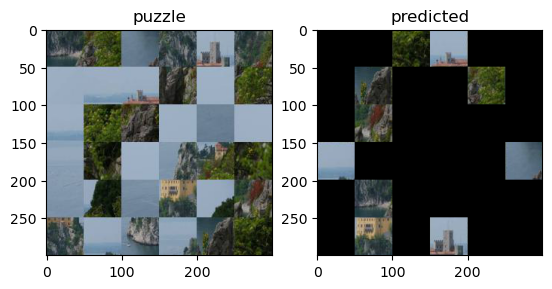

In [46]:
puzzle, predicted = rearrange(out, 1)

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(puzzle)
axarr[0].set_title("puzzle")
axarr[1].imshow(predicted)
axarr[1].set_title("predicted")
#predictions are bad as expected

Text(0.5, 1.0, 'predicted')

<Figure size 640x480 with 0 Axes>

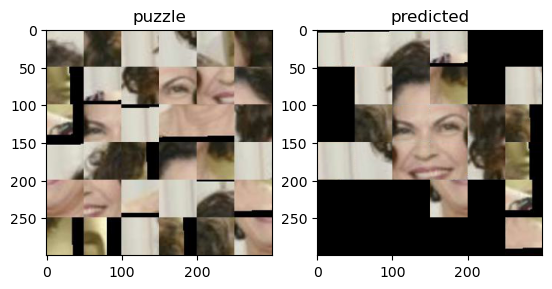

In [47]:
puzzle, predicted = rearrangee(outt, 10)

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(puzzle)
axarr[0].set_title("puzzle")
axarr[1].imshow(predicted)
axarr[1].set_title("predicted")
#predictions are bad as expected

In [48]:
def accuracy(pred, labels):
    correct = 0
    for i in range(pred.shape[0]):
        for j in range(pred[i].shape[0]):
            if pred[i][j] == np.argmax(labels[i], axis=-1)[j]:
                correct += 1
    return correct/(pred.shape[0]*pred[0].shape[0])

accuracy(pred, val_labels)

0.034305555555555554

In [49]:
def accuracy(predd, labels):
    correct = 0
    for i in range(predd.shape[0]):
        for j in range(predd[i].shape[0]):
            if pred[i][j] == np.argmax(labels[i], axis=-1)[j]:
                correct += 1
    return correct/(predd.shape[0]*predd[0].shape[0])

accuracy(predd, val_labelss)

0.027777777777777776

In [50]:
import os
ftest_i='../input/mlware23/dataset/test/faces/'
file=(os.listdir(ftest_i))
ret = []
print(len(file))
for i in (file):
  img=Image.open('../input/mlware23/dataset/test/faces/'+i)
  # print(i)
  img = np.array(img)
  pieces = []
  for i in range(6):
    for j in range(6):
      pieces.append(img[i*50:(i+1)*50, j*50:(j+1)*50])
  ret.append(pieces)


900


In [51]:
import os
ltest_i='../input/mlware23/dataset/test/landmarks/'
lfile=(os.listdir(ltest_i))
lret = []
print(len(lfile))
for i in (lfile):
  img=Image.open('../input/mlware23/dataset/test/landmarks/'+i)
  # print(i)
  img = np.array(img)
  pieces = []
  for i in range(6):
    for j in range(6):
      pieces.append(img[i*50:(i+1)*50, j*50:(j+1)*50])
  lret.append(pieces)



1096


In [52]:
ftest_img=np.array(ret)

In [53]:
ltest_img=np.array(lret)

In [54]:
# # print(val_img)
# print(ftest_img)
preddd = model.predict(ftest_img)
preddd = np.argmax(preddd, axis=-1)

29/29 [==============================] - 3s 97ms/step


In [55]:
lpreddd = model.predict(ltest_img)
lpreddd = np.argmax(lpreddd, axis=-1)

35/35 [==============================] - 3s 98ms/step


In [56]:
preddd

array([[13, 21, 23, ..., 11,  8, 31],
       [ 5,  7, 18, ...,  7, 11, 34],
       [30,  5, 18, ..., 22, 19, 19],
       ...,
       [16,  7,  7, ..., 33, 15, 16],
       [21,  8, 25, ..., 13, 27,  8],
       [ 8,  9, 22, ...,  0, 22, 12]])

In [57]:
lpreddd

array([[ 7,  2, 35, ...,  2,  7,  7],
       [13, 13, 20, ..., 16, 27, 21],
       [35,  2, 25, ...,  2,  4, 34],
       ...,
       [ 8, 18, 25, ..., 13,  7,  9],
       [34,  2, 11, ..., 18, 11, 11],
       [ 2, 18,  7, ..., 25, 34,  2]])

In [58]:
pred_listtt = []
for i in range(preddd.shape[0]):
    t = []
    for j in range(preddd[i].shape[0]):
        t.append(str(preddd[i][j]//6) + str(preddd[i][j]%6))
    pred_listtt.append(t)

image_dfff = pd.DataFrame(file)
label_dfff = pd.DataFrame(pred_listtt)
outtt = pd.concat([image_dfff, label_dfff], axis=1)
# outtt.columns = df.columns


In [59]:
lpred_listtt = []
for i in range(lpreddd.shape[0]):
    t = []
    for j in range(lpreddd[i].shape[0]):
        t.append(str(lpreddd[i][j]//6) + str(lpreddd[i][j]%6))
    lpred_listtt.append(t)

limage_dfff = pd.DataFrame(lfile)
llabel_dfff = pd.DataFrame(lpred_listtt)
louttt = pd.concat([limage_dfff, llabel_dfff], axis=1)
# outtt.columns = df.columns


In [60]:
# df.columns
outtt.columns= ['image', '00', '01', '02', '03', '04', '05', '10', '11', '12', '13',
       '14', '15', '20', '21', '22', '23', '24', '25', '30', '31', '32', '33',
       '34', '35', '40', '41', '42', '43', '44', '45', '50', '51', '52', '53',
       '54', '55']

In [61]:
# df.columns
louttt.columns= ['image', '00', '01', '02', '03', '04', '05', '10', '11', '12', '13',
       '14', '15', '20', '21', '22', '23', '24', '25', '30', '31', '32', '33',
       '34', '35', '40', '41', '42', '43', '44', '45', '50', '51', '52', '53',
       '54', '55']

In [62]:
outtt

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,WGQXHxMR9O.jpg,21,33,35,15,13,31,15,54,01,...,51,15,02,53,21,42,53,15,12,51
1,9U8qCFtbm6.jpg,05,11,30,30,00,12,00,31,25,...,32,45,33,22,22,24,54,11,15,54
2,5c226K9FPa.jpg,50,05,30,33,30,24,45,00,34,...,15,01,50,13,12,34,32,34,31,31
3,gQZ2RkWph6.jpg,13,45,55,23,14,54,15,12,02,...,04,44,34,34,52,21,24,54,43,00
4,CKQKTWgIWM.jpg,32,55,42,21,24,53,34,01,12,...,54,13,12,24,41,02,11,14,30,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,rYaaPLt00W.jpg,32,55,31,31,55,42,14,24,14,...,54,24,13,20,22,23,51,24,34,54
896,VdbxsFQx5q.jpg,33,03,13,15,13,11,33,13,15,...,13,53,32,32,33,11,22,33,21,32
897,3sRjyN4qMt.jpg,24,11,11,50,10,45,31,13,40,...,30,04,03,32,42,55,04,53,23,24
898,KqHjwuLD8a.jpg,33,12,41,34,43,24,21,04,43,...,12,02,24,22,01,32,11,21,43,12


In [63]:
louttt

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,KAaYWOONwc.jpg,11,02,55,24,02,31,21,02,02,...,24,02,21,34,02,53,11,02,11,11
1,Jn0mEtt6ru.jpg,21,21,32,03,12,32,43,21,15,...,12,22,32,34,33,15,24,24,43,33
2,ej6bggtV8J.jpg,55,02,41,02,02,02,02,30,55,...,02,02,52,02,25,30,05,02,04,54
3,ulozGUHcHq.jpg,21,52,54,41,14,34,53,54,11,...,15,15,15,54,03,12,03,34,34,30
4,dqqUqsVIT9.jpg,14,11,10,52,51,32,14,50,24,...,50,05,02,54,50,21,14,14,30,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,LtSWXrsNf9.jpg,30,11,11,12,51,30,42,30,24,...,30,21,30,12,14,34,51,30,34,03
1092,u7hsNtpX0P.jpg,21,10,10,33,00,21,00,25,15,...,12,25,42,15,32,00,00,03,00,21
1093,bPnwug5C6l.jpg,12,30,41,34,03,12,21,13,34,...,11,14,13,11,11,32,11,21,11,13
1094,lzz6bPFDjZ.jpg,54,02,15,30,15,30,11,30,30,...,30,30,15,10,30,30,30,30,15,15


In [64]:
# ftest_img

In [65]:
def prediction_to_submission(df):
    df = df.copy()
    for s in ['r','c']:
        for i in range(6):
            for j in range(6):
                df[str(s)+str(i)+str(j)] = None

    for idx in df.index:
        for i in range(6):
            for j in range(6):
                df.loc[idx, 'r'+str(i)+str(j)] = int(df.loc[idx, str(i)+str(j)][0])
                df.loc[idx, 'c'+str(i)+str(j)] = int(df.loc[idx, str(i)+str(j)][1])

    columns_to_remove = []
    for i in range(6):
        for j in range(6):
            columns_to_remove.append(str(i)+str(j))

    return df.drop(columns=columns_to_remove)

In [66]:
submission = prediction_to_submission(outtt)

In [67]:
lsubmission = prediction_to_submission(louttt)

In [68]:
submission

,image,r00,r01,r02,r03,r04,r05,r10,r11,r12,...,c42,c43,c44,c45,c50,c51,c52,c53,c54,c55
0,WGQXHxMR9O.jpg,2,3,3,1,1,3,1,5,0,...,1,5,2,3,1,2,3,5,2,1
1,9U8qCFtbm6.jpg,0,1,3,3,0,1,0,3,2,...,2,5,3,2,2,4,4,1,5,4
2,5c226K9FPa.jpg,5,0,3,3,3,2,4,0,3,...,5,1,0,3,2,4,2,4,1,1
3,gQZ2RkWph6.jpg,1,4,5,2,1,5,1,1,0,...,4,4,4,4,2,1,4,4,3,0
4,CKQKTWgIWM.jpg,3,5,4,2,2,5,3,0,1,...,4,3,2,4,1,2,1,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,rYaaPLt00W.jpg,3,5,3,3,5,4,1,2,1,...,4,4,3,0,2,3,1,4,4,4
896,VdbxsFQx5q.jpg,3,0,1,1,1,1,3,1,1,...,3,3,2,2,3,1,2,3,1,2
897,3sRjyN4qMt.jpg,2,1,1,5,1,4,3,1,4,...,0,4,3,2,2,5,4,3,3,4
898,KqHjwuLD8a.jpg,3,1,4,3,4,2,2,0,4,...,2,2,4,2,1,2,1,1,3,2


In [69]:
lsubmission

,image,r00,r01,r02,r03,r04,r05,r10,r11,r12,...,c42,c43,c44,c45,c50,c51,c52,c53,c54,c55
0,KAaYWOONwc.jpg,1,0,5,2,0,3,2,0,0,...,4,2,1,4,2,3,1,2,1,1
1,Jn0mEtt6ru.jpg,2,2,3,0,1,3,4,2,1,...,2,2,2,4,3,5,4,4,3,3
2,ej6bggtV8J.jpg,5,0,4,0,0,0,0,3,5,...,2,2,2,2,5,0,5,2,4,4
3,ulozGUHcHq.jpg,2,5,5,4,1,3,5,5,1,...,5,5,5,4,3,2,3,4,4,0
4,dqqUqsVIT9.jpg,1,1,1,5,5,3,1,5,2,...,0,5,2,4,0,1,4,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,LtSWXrsNf9.jpg,3,1,1,1,5,3,4,3,2,...,0,1,0,2,4,4,1,0,4,3
1092,u7hsNtpX0P.jpg,2,1,1,3,0,2,0,2,1,...,2,5,2,5,2,0,0,3,0,1
1093,bPnwug5C6l.jpg,1,3,4,3,0,1,2,1,3,...,1,4,3,1,1,2,1,1,1,3
1094,lzz6bPFDjZ.jpg,5,0,1,3,1,3,1,3,3,...,0,0,5,0,0,0,0,0,5,5


In [70]:
resultframe=[submission,lsubmission]
s=pd.concat(resultframe)

In [71]:
s.to_csv('submission5.csv',index=False)

In [72]:
# accuracy calculation
def accuracy(original, predicted):
    count = 0
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            if original[i,j] == predicted[i,j]:
                count += 1
    return count/(original.shape[0]*original.shape[1])

#accuracy calculation
def accuracyy(original, predicted):
    count = 0
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            if original[i,j] == predicted[i,j]:
                count += 1
    return count/(original.shape[0]*original.shape[1])

#calculating accuracy
original = np.argmax(val_labels, axis=-1)
predicted = pred
print(accuracy(original, predicted))



0.034305555555555554


In [73]:
#calculating accuracy
original = np.argmax(val_labelss, axis=-1)
predicted = predd
print(accuracyy(original, predicted))

#The accuracy

0.29385964912280704
